import necessary libraries

In [244]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Merge data from each table

In [3]:
path = '.\Bike_Trip'
files = [file for file in os.listdir(path)]


all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path + '\\' + file)               
    all_months_data = pd.concat([all_months_data, current_data]) #concatenating csv files

all_months_data.to_csv('all_data', index=False)

Read csv file created

In [4]:
bk_trips = pd.read_csv('all_data.csv')
bk_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,E19E6F1B8D4C42ED,electric_bike,2021-01-23 16:14:19,2021-01-23 16:24:44,California Ave & Cortez St,17660,NaN,NaN,41.900341,-87.696743,41.89,-87.72,member
1,DC88F20C2C55F27F,electric_bike,2021-01-27 18:43:08,2021-01-27 18:47:12,California Ave & Cortez St,17660,NaN,NaN,41.900333,-87.696707,41.90,-87.69,member
2,EC45C94683FE3F27,electric_bike,2021-01-21 22:35:54,2021-01-21 22:37:14,California Ave & Cortez St,17660,NaN,NaN,41.900313,-87.696643,41.90,-87.70,member
3,4FA453A75AE377DB,electric_bike,2021-01-07 13:31:13,2021-01-07 13:42:55,California Ave & Cortez St,17660,NaN,NaN,41.900399,-87.696662,41.92,-87.69,member
4,BE5E8EB4E7263A0B,electric_bike,2021-01-23 02:24:02,2021-01-23 02:24:45,California Ave & Cortez St,17660,NaN,NaN,41.900326,-87.696697,41.90,-87.70,casual


### Clean up the data

Task #1 Drop NaN values

In [5]:
bk_trips = bk_trips.dropna()
bk_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,member
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,41.900406,-87.696733,41.910435,-87.696890,member
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900374,-87.696688,41.899180,-87.672178,casual
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900379,-87.696716,41.899149,-87.672177,casual
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,41.900363,-87.696704,41.899181,-87.672200,casual


Task #2 Removing characters from column values

In [6]:
bk_trips[['start_station_id', 'end_station_id']] = bk_trips[['start_station_id', 'end_station_id'
                                                    ]].applymap(lambda x: x.lstrip('KAPLF-RNSWHubbard Bike-checking (LBS-WH-TEST)'))

Task #3 Drop not needed columns

In [7]:
bk_trips.drop(['start_lat', 'start_lng', 'end_lat', 'end_lng'], axis=1 ,inplace=True)
bk_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,member
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,member
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,casual
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,casual
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,casual


### Augment data with additional columns

In [8]:
# Convert columns datetime

bk_trips.started_at = pd.to_datetime(bk_trips.started_at)
bk_trips.ended_at = pd.to_datetime(bk_trips.ended_at)

# Add trip duration column

bk_trips['trip_duration_minutes'] = (bk_trips.ended_at - bk_trips.started_at) / pd.Timedelta(minutes=1)

# Add day of week column

bk_trips['day_of_week'] = bk_trips['started_at'].dt.day_of_week

bk_trips.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,trip_duration_minutes,day_of_week
9,B9F73448DFBE0D45,classic_bike,2021-01-24 19:15:38,2021-01-24 19:22:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,member,7.216667,6
10,457C7F4B5D3DA135,electric_bike,2021-01-23 12:57:38,2021-01-23 13:02:10,California Ave & Cortez St,17660,California Ave & North Ave,13258,member,4.533333,5
11,57C750326F9FDABE,electric_bike,2021-01-09 15:28:04,2021-01-09 15:37:51,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,casual,9.783333,5
12,4D518C65E338D070,electric_bike,2021-01-09 15:28:57,2021-01-09 15:37:54,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,casual,8.950000,5
13,9D08A3AFF410474D,classic_bike,2021-01-24 15:56:59,2021-01-24 16:07:08,California Ave & Cortez St,17660,Wood St & Augusta Blvd,657,casual,10.150000,6


### Data Explotarion

Question 1: What is the top five most popular station to start a trip?

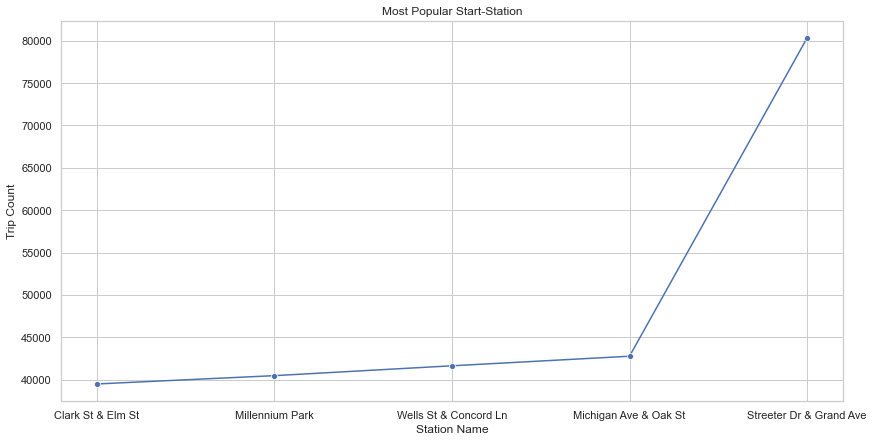

In [245]:
# Get data

popular_start_station = bk_trips['start_station_name'].value_counts().head(5).sort_values()
popular_start_station

# Plot confg

fig, ax = plt.subplots(figsize=(14, 7))
t = sns.lineplot(data=popular_start_station, 
                marker='o'
)

t.set(xlabel='Station Name', ylabel='Trip Count', 
      title='Most Popular Start-Station'
)

plt.show()

Question 2: What is the most used start-station by users?

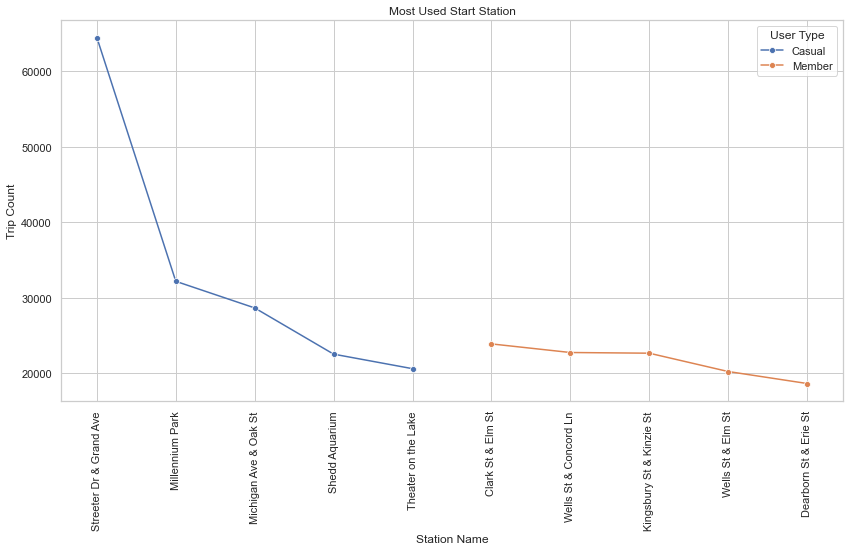

In [230]:
# Get data
station_group = bk_trips['start_station_name'].groupby(bk_trips['member_casual']).value_counts()
station_group.groupby(level=0, group_keys=False).head(5).reset_index(name='trip_count')
start_station = station_group.groupby(level=0, group_keys=False).head(5).reset_index(name='trip_count')
start_station

# Plot conf
fig, ax = plt.subplots(figsize=(14, 7))
g = sns.lineplot(x='start_station_name', y='trip_count', 
                hue='member_casual', data=start_station, 
                marker='o'
)

g.set(xlabel='Station Name', ylabel='Trip Count', 
      title='Most Used Start-Station'
)
g.legend(title='User Type', labels=['Casual', 'Member'])
plt.xticks(rotation=90)
plt.show()


Question 2: How many trips were made for each bike type?

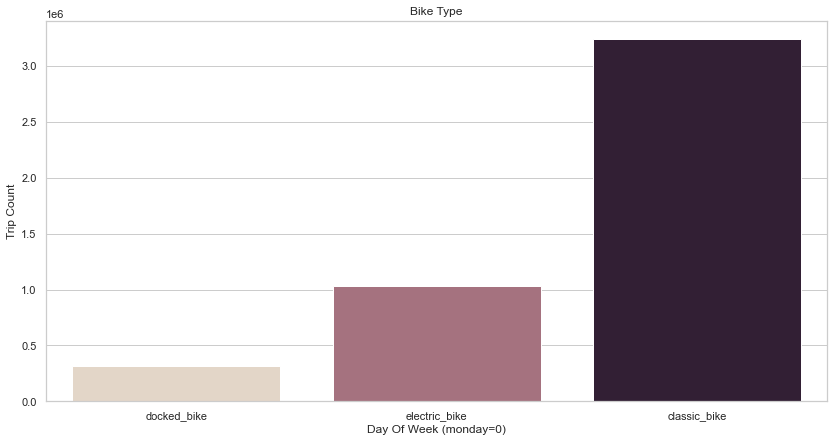

In [231]:
# Get data

bike_trips = bk_trips.groupby('rideable_type').size().reset_index(name='trip_count').sort_values(by='trip_count')

# Plot confg

fig, ax = plt.subplots(figsize=(14, 7))
e = sns.barplot(data=bike_trips,
                x='rideable_type',
                y='trip_count',
                palette='ch:start=.2'
)

e.set(xlabel='Day Of Week (monday=0)', ylabel='Trip Count', 
    title='Bike Type'
)
plt.show()


Question 3: What is the average time for users riding any type of bike at any day?

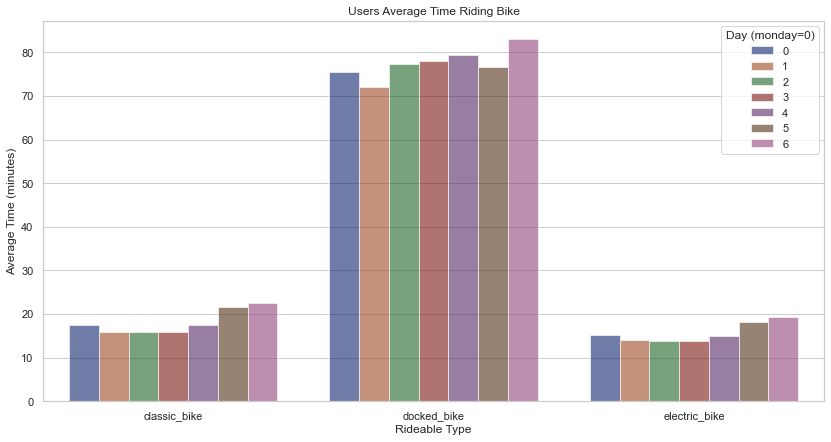

In [130]:
# Get Data
bike_group = bk_trips.groupby(['rideable_type','day_of_week'])['trip_duration_minutes'].agg(np.mean).reset_index()

# Plot confg
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(14, 7))
r = sns.barplot(data=bike_group,
                    x='rideable_type',
                    y='trip_duration_minutes',
                    hue='day_of_week',ci='sd', 
                    palette='dark', alpha=.6                 
)

r.set(xlabel='Rideable Type', ylabel='Average Time (minutes)', 
        title='Users Average Time Riding Bike'
)

r.legend(title='Day (monday=0)')

plt.show()           

Question 4: What is the most active day of week?

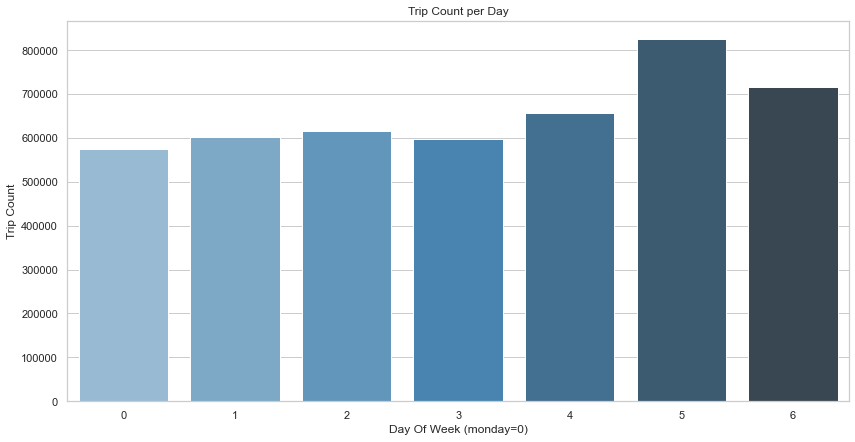

In [129]:
# Get data
day_group = bk_trips.groupby('day_of_week')
day_group_count = day_group.size().reset_index(name='trip_count').sort_values(['trip_count'])

# Chart Confg

fig, ax = plt.subplots(figsize=(14, 7))
f = sns.barplot(data=day_group_count,
                x='day_of_week', y='trip_count',
                palette='Blues_d'
)

f.set(xlabel='Day Of Week (monday=0)', ylabel='Trip Count', 
        title='Trip Count per Day'
)
plt.show()


What is the busiest time of the day and busiest day for each user type?

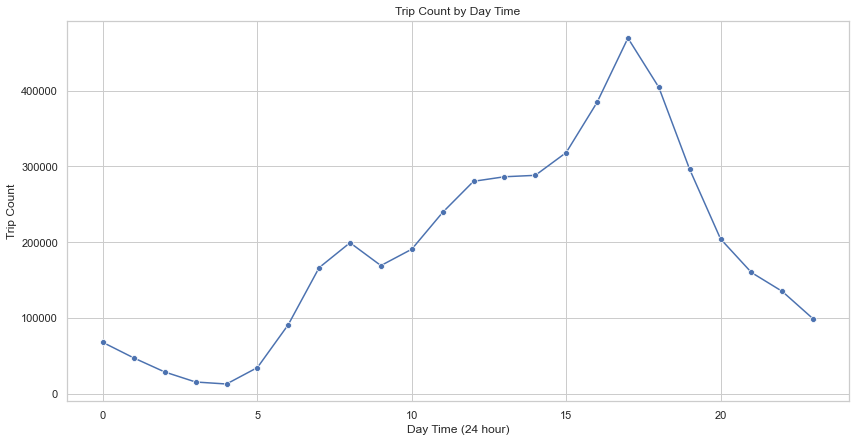

In [131]:
# Get data
busiest = bk_trips[['member_casual','started_at']].copy()

busiest['started_at_hour'] = busiest['started_at'].dt.hour

busiest_time = busiest.groupby('started_at_hour').size().reset_index(name='trip_count')
busiest_time

# Plot conf
fig, ax = plt.subplots(figsize=(14, 7))
t = sns.lineplot(x='started_at_hour', y='trip_count', 
                data=busiest_time, 
                marker='o'
)

t.set(xlabel='Day Time (24 hour)', ylabel='Trip Count', 
      title='Trip Count by Day Time'
)

plt.show()

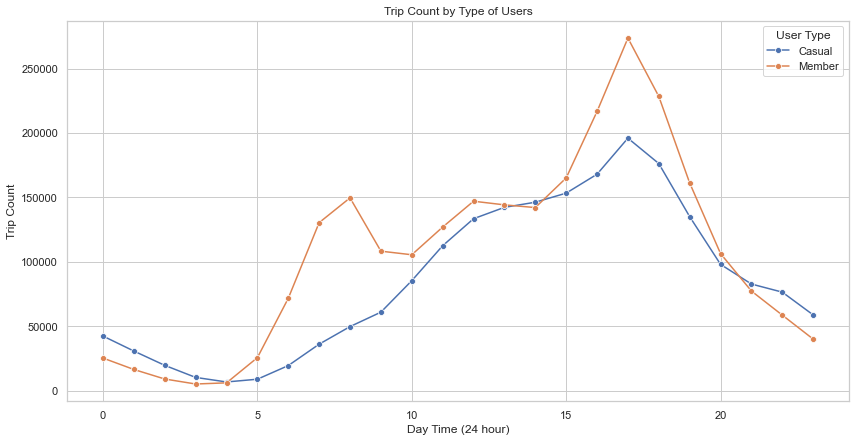

In [124]:
# Get data
busiest_time_member = busiest.groupby(['member_casual', 'started_at_hour']).size().reset_index(name='trips_count')
busiest_time_member

# Plot conf
fig, ax = plt.subplots(figsize=(14, 7))
g = sns.lineplot(x='started_at_hour', y='trips_count', 
                hue='member_casual', data=busiest_time_member, 
                marker='o'
)

g.set(xlabel='Day Time (24 hour)', ylabel='Trip Count', 
      title='Trip Count by Type of Users'
)
g.legend(title='User Type', labels=['Casual', 'Member'])
plt.show()
